노이즈가 포함된 이미지 복원

In [2]:
import pandas as pd
import torch
import pickle


In [3]:
shp_org_img = (100,100)
broken_img = torch.FloatTensor(pickle.load(open('Data/broken_image_t.p', 'rb'), encoding='latin1'))

In [4]:
import matplotlib.pyplot as plt
import os    

os.environ['KMP_DUPLICATE_LIB_OK']='True'   # 이미지 matplotlib출력할 때 에러가 나는 경우가 있음. 이에 대한 처리

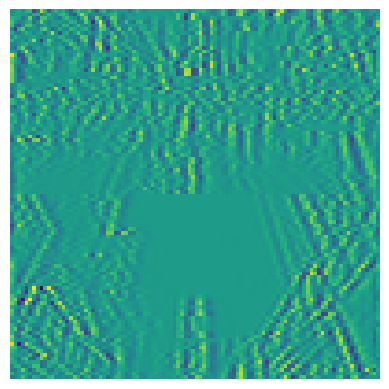

In [5]:
#오염된 이미지

plt.imshow(broken_img.view(100,100))
plt.axis('off')
plt.show()

In [6]:
# 이미지에 노이즈 추가

def weird_function(x, n_iter=5):
    h = x
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat((zero_tensor, h[:-1]), 0)  # cat: 텐서 연결. 합치기
        h_r = torch.cat((h[1:], zero_tensor), 0)
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:   # 2로 나누었을 때 짝수가 되면 합쳐라
            h = torch.cat((h[h.shape[0]//2:], h[:h.shape[0]//2]), 0)
    return h

# 손실계산함수
def distance_loss(hypothesis, broken_img):
    return torch.dist(hypothesis, broken_img)

# 랜덤이미지 텐서
random_tensor = torch.randn(10000, dtype=torch.float)
random_tensor

tensor([-0.2314, -2.0556,  1.0626,  ...,  1.2473,  0.4499, -1.3397])

In [7]:
lr = 0.8
for i in range(0, 20000):
    # 자동미분 on
    random_tensor.requires_grad_(True)

    # 이미지에 노이즈 추가
    hypothesis = weird_function(random_tensor)

    # 오차계산
    loss = distance_loss(hypothesis, broken_img)
    loss.backward()

    # 자동미분 off
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad
    if i % 1000 == 0:
        print("Loss at {} = {}".format(i, loss.item()))



Loss at 0 = 12.249361991882324
Loss at 1000 = 1.1771132946014404
Loss at 2000 = 0.5513570308685303
Loss at 3000 = 0.3818645477294922
Loss at 4000 = 0.30206960439682007
Loss at 5000 = 0.252766489982605
Loss at 6000 = 0.21743805706501007
Loss at 7000 = 0.18954889476299286
Loss at 8000 = 0.16604959964752197
Loss at 9000 = 0.14534421265125275
Loss at 10000 = 0.12651661038398743
Loss at 11000 = 0.10900185257196426
Loss at 12000 = 0.09243260324001312
Loss at 13000 = 0.07656168192625046
Loss at 14000 = 0.0612194761633873
Loss at 15000 = 0.04628856107592583
Loss at 16000 = 0.031688474118709564
Loss at 17000 = 0.021142808720469475
Loss at 18000 = 0.021164923906326294
Loss at 19000 = 0.02116706781089306


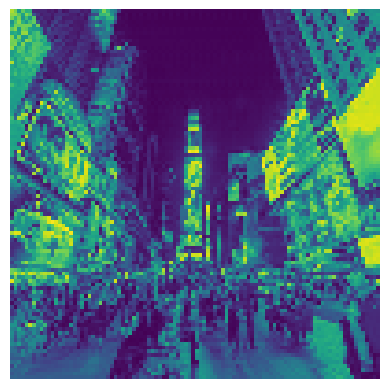

In [8]:
# 복원된 이미지
plt.imshow(random_tensor.view(100,100).data)
plt.axis('off')
plt.show()